## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

In [6]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 70kB/s 
     |████████████████████████████████| 450kB 56.1MB/s 
     |████████████████████████████████| 3.8MB 43.8MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

###1. Import and set and Tensorflow 2 and verify version

In [0]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train_f), (x_test, y_test_f) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [0]:
class_names = ['T-shirt','Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

###4. Find no.of samples in training and test dataset

In [5]:
x_train.shape

(60000, 28, 28)

In [49]:
y_train_f.shape

(60000,)

In [7]:
x_test.shape

(10000, 28, 28)

In [50]:
y_test_f.shape

(10000,)

###5. Find dimensions of an image in the dataset

In [9]:
x_train[1].shape# Shows 28*28 image size

(28, 28)

### 6. Verify if existing labels/Classes are correct 

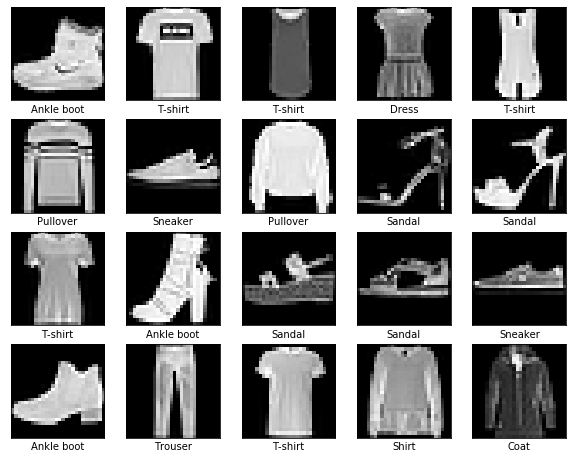

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train_f[i]])
plt.show()# Labels looks perfect match

### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train = tf.keras.utils.to_categorical(y_train_f, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test_f, num_classes=10)

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [0]:
train_x = tf.keras.backend.expand_dims(
    x_train,
    axis=-1
)#Reshaping outside of model

In [0]:
test_x = tf.keras.backend.expand_dims(
    x_test,
    axis=-1
)

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()


#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))  # Reshaping done already

#normalize data
model.add(tf.keras.layers.BatchNormalization())


###10. Import the necessary layers from keras to build the model

In [0]:
# Already all steps above

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:

#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))


In [0]:
#Flatten the output
model.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
#Train the model
model.fit(train_x,tf.convert_to_tensor(y_train),
          validation_data=(test_x,tf.convert_to_tensor(y_test)),
          epochs=10,
          batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.3696 - accuracy: 0.8666 - val_loss: 0.2931 - val_accuracy: 0.8938
Epoch 2/10
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.2235 - accuracy: 0.9171 - val_loss: 0.2528 - val_accuracy: 0.9104
Epoch 3/10
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.1554 - accuracy: 0.9430 - val_loss: 0.2491 - val_accuracy: 0.9150
Epoch 4/10
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.1056 - accuracy: 0.9597 - val_loss: 0.2711 - val_accuracy: 0.9191
Epoch 5/10
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.0680 - accuracy: 0.9752 - val_loss: 0.3197 - val_accuracy: 0.9113
Epoch 6/10
60000/60000 [==============================] - 144s 2ms/sample - loss: 0.0454 - accuracy: 0.9840 - val_loss: 0.3781 - val_accuracy: 0.9107
Epoch 7/10
60000/60000 [==========================

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo multiple                  4         
_________________________________________________________________
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  9248      
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  2359424   
_________________________________________________________________
dense_1 (Dense)              multiple                  1290      
Total params: 2,370,286
Trainable params: 2,370,284
Non-trainable params: 2
______________________________________________

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
tf.keras.backend.clear_session()
#Initialize model, reshape & normalize data
model2 = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model2.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#normalize data
model2.add(tf.keras.layers.BatchNormalization())


In [0]:

#Add first convolutional layer
model2.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))


In [0]:

#Add MaxPooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

In [0]:
#Flatten the output
model2.add(tf.keras.layers.Flatten())

In [0]:
#Dense layer
model2.add(tf.keras.layers.Dense(128, activation='relu'))

#dropout layer
model2.add(tf.keras.layers.Dropout(0.25))

#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

###13. Verify accuracy of the model

> 

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
#Train the model
model2.fit(train_x,tf.convert_to_tensor(y_train),          
          validation_data=(test_x,tf.convert_to_tensor(y_test)),
          epochs=10,
          batch_size=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 124s 2ms/sample - loss: 0.4183 - accuracy: 0.8488 - val_loss: 0.3000 - val_accuracy: 0.8929
Epoch 2/10
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.2618 - accuracy: 0.9051 - val_loss: 0.2509 - val_accuracy: 0.9070
Epoch 3/10
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.2127 - accuracy: 0.9208 - val_loss: 0.2316 - val_accuracy: 0.9179
Epoch 4/10
60000/60000 [==============================] - 124s 2ms/sample - loss: 0.1771 - accuracy: 0.9340 - val_loss: 0.2379 - val_accuracy: 0.9171
Epoch 5/10
60000/60000 [==============================] - 124s 2ms/sample - loss: 0.1479 - accuracy: 0.9449 - val_loss: 0.2399 - val_accuracy: 0.9198
Epoch 6/10
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.1246 - accuracy: 0.9534 - val_loss: 0.2402 - val_accuracy: 0.9245
Epoch 7/10
60000/60000 [==========================

In [38]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo multiple                  4         
_________________________________________________________________
conv2d (Conv2D)              multiple                  320       
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) multiple                  0         
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  589952    
_________________________________________________________________
dropout (Dropout)            multiple                  0

####14. Verify performance of your model selectively 

In [0]:
predictions = model2.predict(train_x)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color='green')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

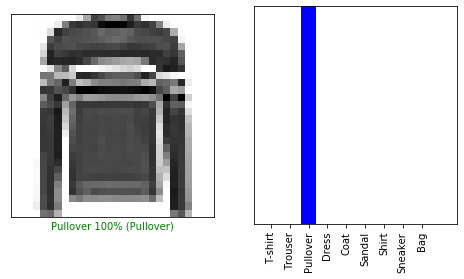

In [60]:
#Replace value of i with other index to check other product
import numpy as np
i = 5
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train_f, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train_f)
plt.show()

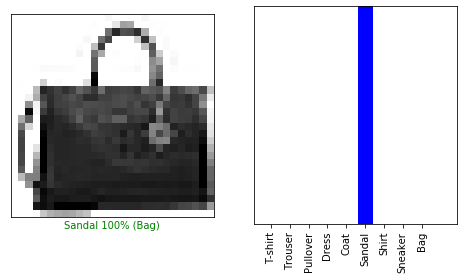

In [63]:
#Replace value of i with other index to check other product
import numpy as np
i = 30
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test_f, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test_f)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.2, horizontal_flip=True, vertical_flip=True, rotation_range=5)

datagen.fit(train_x)

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

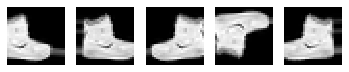

In [69]:
from matplotlib import pyplot as plt
gen = datagen.flow(train_x[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()